# Experiment 24

Analysis of Phantom data from March 27, 2024

Measured B fields:

- Center (water): 123.23057 Mhz
- Fat: -0.000410 Mhz

In [26]:
dt = 1 / 410 * 1000 # 2.4390243902439024 ms

# From March 13, 2024 dataset
t0 = 3.41
t1 = 4.55
t2 = 5.68
print(t0, t1, t2, t2 - t0)

# Calculated t1, t2 from B fields of March 27, 2004
t0 = 3.14
t1 = t0 + (2.439 / 2)
t2 = t0 + (2.439)
print(t0, t1, t2, dt)

3.41 4.55 5.68 2.2699999999999996
3.14 4.359500000000001 5.579000000000001 2.4390243902439024


In [27]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP

In [28]:
path = get_project_path()
M = dataset.load_dataset12a( path)
M.shape

Data: 20240327_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20240327_GASP_PHANTOM\dixon2\
Loading files: ['meas_MID167_gre_TE3p41_FID61015.dat', 'meas_MID168_gre_TE4p36_FID61016.dat', 'meas_MID169_gre_TE5p58_FID61017.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

(128, 128, 8, 3)

In [29]:
M0 = M[:,:,:,0]
M1 = M[:,:,:,1]
M2 = M[:,:,:,2]

field_map = np.angle(np.conjugate(M0) * M2)
f = np.exp(-1j * field_map / 2)
Mw = M0 + M1
Mf = M0 - M1
Mw3 = M0 + M1 * np.exp(-1j * field_map / 2)
Mf3 = M0 - M1 * np.exp(-1j * field_map / 2)

Mw = np.sqrt(np.sum(np.abs(Mw)**2, axis=2))
Mf = np.sqrt(np.sum(np.abs(Mf)**2, axis=2))
Mw3 = np.sqrt(np.sum(np.abs(Mw3)**2, axis=2))
Mf3 = np.sqrt(np.sum(np.abs(Mf3)**2, axis=2))

[]

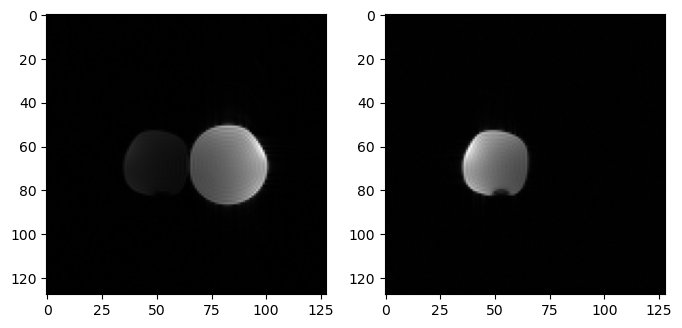

In [30]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(np.abs(Mw3), cmap='gray')
ax2.imshow(np.abs(Mf3), cmap='gray')
plt.plot()